In [1]:
!pip install ipywidgets
import widgets

ModuleNotFoundError: No module named 'widgets'

In [2]:
import json 
import numpy as np
import pandas as pd

In [3]:
import io
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
from pandas.plotting import scatter_matrix

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Pre-Proccessing Steps

In [6]:
#Import CSV
import pandas as pd
df_raw = pd.read_csv('FINAL_DATAFRAME.csv')

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99677 entries, 0 to 99676
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POINT_X            99677 non-null  float64
 1   POINT_Y            99677 non-null  int64  
 2   AGE                99677 non-null  int64  
 3   HEIGHT             99677 non-null  float64
 4   OSM_ID             99677 non-null  int64  
 5   ENVELOPE_AREA      99677 non-null  float64
 6   WALL_AREA          99677 non-null  float64
 7   PERIMETER          99677 non-null  float64
 8   AREA               99677 non-null  float64
 9   HEIGHT/AREA        99677 non-null  float64
 10  AV_NO_FLOORS       99677 non-null  int64  
 11  VOLUME             99677 non-null  float64
 12  VERTEX_COMPLEXITY  99677 non-null  float64
 13  PER(A)/AREA        99677 non-null  float64
 14  MBR_LENGTH         99677 non-null  float64
 15  MBR_WIDTH          99677 non-null  float64
 16  MBR_AREA           996

In [8]:
# checking columns for missing values
df_raw.isna().sum()

POINT_X              0
POINT_Y              0
AGE                  0
HEIGHT               0
OSM_ID               0
ENVELOPE_AREA        0
WALL_AREA            0
PERIMETER            0
AREA                 0
HEIGHT/AREA          0
AV_NO_FLOORS         0
VOLUME               0
VERTEX_COMPLEXITY    0
PER(A)/AREA          0
MBR_LENGTH           0
MBR_WIDTH            0
MBR_AREA             0
MBR_L/W              0
ERI                  0
CONVEX               0
RI                   0
DENSITY              0
VOIDAREA_STD         0
NO_POLYLINES         0
NO_OF_INTRUSIONS     0
BBOX(A)/AREA         0
POINT_ON_BBOX        0
SEGMENTS_STD         0
SEGMENTS_AV          0
REG_VERTICES         0
PER/AREA             0
AREA-VOIDAREA        0
VERTEX_COUNT(S)      0
dtype: int64

In [9]:
# Select subset of columns aka variables
Columns_of_interest = ["POINT_X" ,
                      "POINT_Y",
                      "OSM_ID",
                      "AGE",
                      "HEIGHT",
                      "AREA",
                      "VOLUME",
                      "MBR_LENGTH",
                      "MBR_WIDTH",
                      "MBR_L/W",
                      "PERIMETER",
                      "WALL_AREA",
                       "VERTEX_COUNT(S)",
                       "VERTEX_COMPLEXITY",
                       "ERI",
                       "CONVEX",
                       "RI",
                       "DENSITY",
                       "NO_POLYLINES",
                       "BBOX(A)/AREA",
                       "PER/AREA",
                       "AREA-VOIDAREA",
                      ]
# create new dataframe 
df = df_raw[Columns_of_interest]

In [10]:
# Finding correlation (uncover correlated variables)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\james\AppData\Local\Temp\ipykernel_20236\2887697062.py:3: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



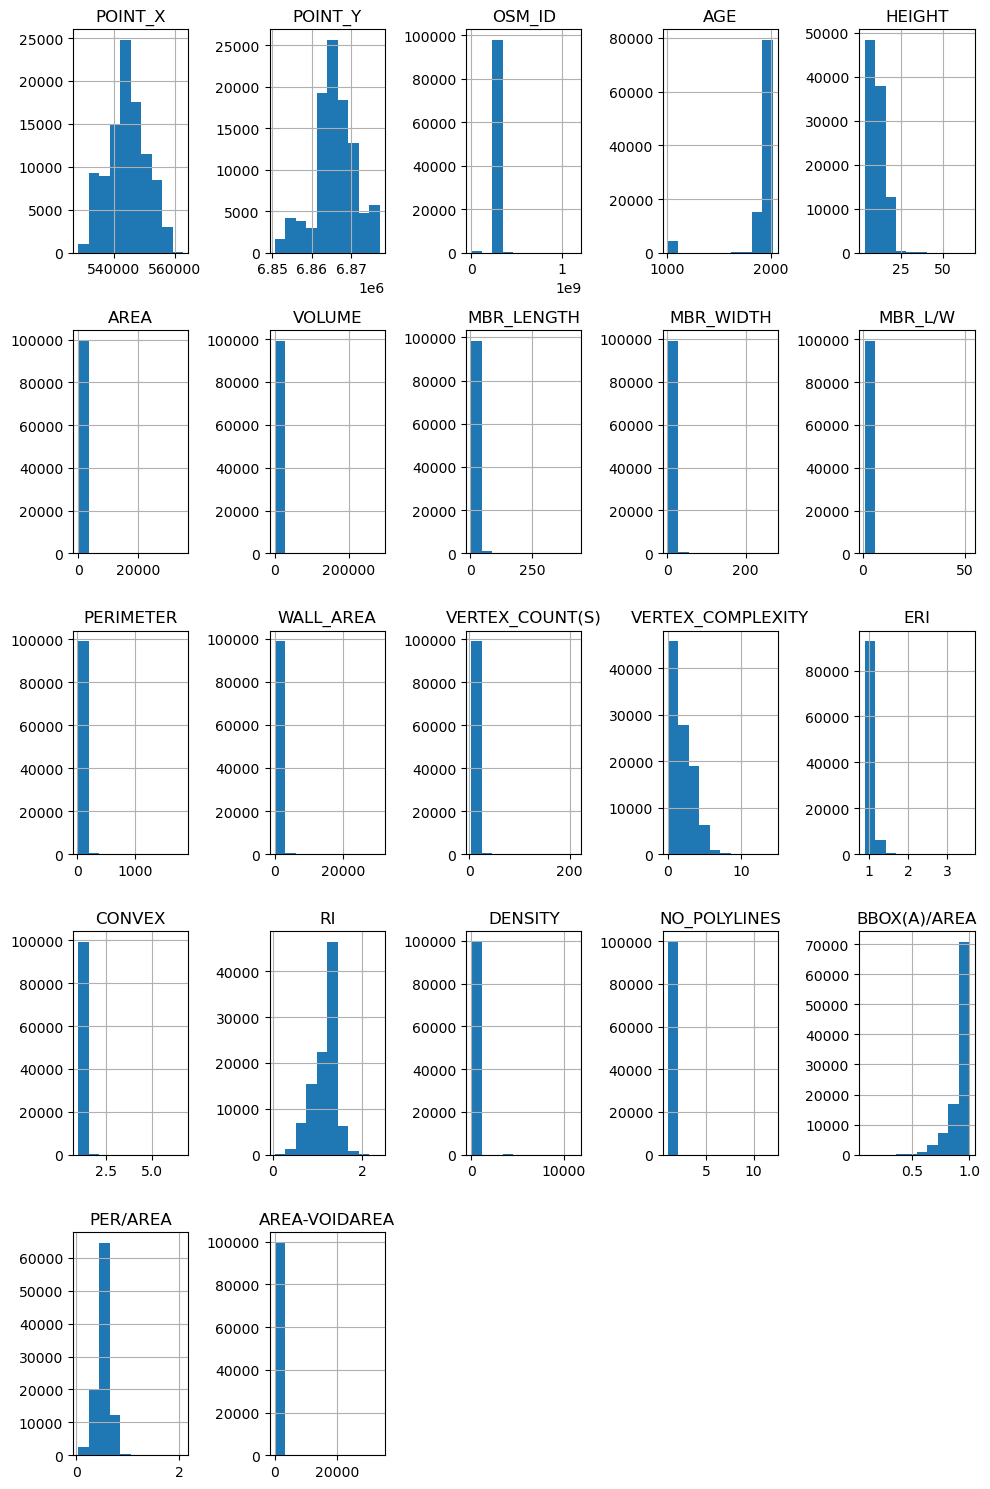

In [11]:
# Data distribution (histograms) for each variable
ax = df.hist(figsize=(10,15))
plt.tight_layout()
plt.show()

In [12]:
# Extract coords from data
df = df.rename(columns={"POINT_X": "X", "POINT_Y": "Y"})
df_coords = df[['X', 'Y']]

# df_data   = df[['ForestPark', 'UrbanParks', 'HN_noise_40', 'RailwaySystem', 'PortSystem']]
df_data   = df.drop(["X" , "Y", "AGE", "OSM_ID", ], axis=1)

# Scale data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_data),
    columns=df_data.columns)

In [13]:
def map_clustering_results(coords, model):
    labels = model.labels_
    for label in np.unique(labels):
        x = coords['X'].to_numpy()[labels == label]
        y = coords['Y'].to_numpy()[labels == label]
        plt.scatter(x, y, label=model.labels_)

In [14]:
print(scaled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99677 entries, 0 to 99676
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HEIGHT             99677 non-null  float64
 1   AREA               99677 non-null  float64
 2   VOLUME             99677 non-null  float64
 3   MBR_LENGTH         99677 non-null  float64
 4   MBR_WIDTH          99677 non-null  float64
 5   MBR_L/W            99677 non-null  float64
 6   PERIMETER          99677 non-null  float64
 7   WALL_AREA          99677 non-null  float64
 8   VERTEX_COUNT(S)    99677 non-null  float64
 9   VERTEX_COMPLEXITY  99677 non-null  float64
 10  ERI                99677 non-null  float64
 11  CONVEX             99677 non-null  float64
 12  RI                 99677 non-null  float64
 13  DENSITY            99677 non-null  float64
 14  NO_POLYLINES       99677 non-null  float64
 15  BBOX(A)/AREA       99677 non-null  float64
 16  PER/AREA           996

# BIRCH CLUSTERING

In [15]:
#Birch is computed as a method of Data reduction, NOT as a final clustering method

In [16]:
# Perform Birch clustering
brc_model = Birch(branching_factor=2, n_clusters=None, threshold=0.05, compute_labels=True)
brc_model.fit(scaled_df)

Birch(branching_factor=2, n_clusters=None, threshold=0.05)

In [17]:
# Add the Birch clustering labels to the DataFrame
df['Birch Cluster'] = brc_model.labels_

# DIANA CLUSTERING 

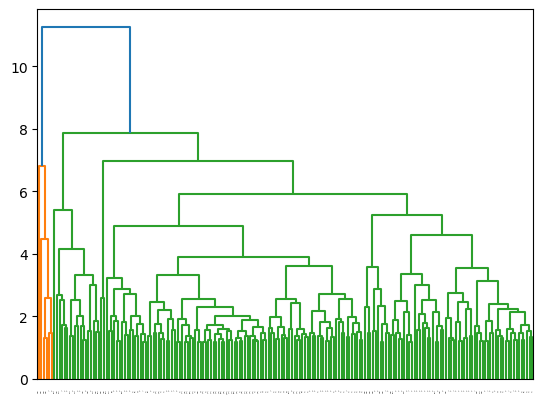

<Figure size 1500x1000 with 0 Axes>

In [18]:
# Compute linkage matrix for hierarchical clustering
dist_mat = linkage(brc_model.subcluster_centers_, method='complete', metric='cityblock')

# Generate dendrogram
dendrogram(dist_mat, truncate_mode='lastp', p=190, leaf_rotation=90., leaf_font_size=1., show_contracted=True)

# Plot the dendrogram
plt.figure(figsize=(15, 10))  # Adjust the figure size as per your preference
plt.show()

In [52]:
# Perform DIANA clustering using the specified threshold
diana_model = fcluster(dist_mat, t=1.4, criterion='distance')

In [53]:
# Create a mapping between Birch subcluster labels and DIANA cluster labels
mapping = {}
for i, birch_label in enumerate(np.unique(df['Birch Cluster'])):
    mapping[birch_label] = diana_model[i % len(diana_model)]

In [54]:
# Add the DIANA clustering labels to the Birch subcluster labels
df['DIANA Cluster'] = df['Birch Cluster'].map(mapping)

In [55]:
print(df)

              X        Y      OSM_ID   AGE    HEIGHT        AREA  \
0      543419.6  6865734    57858477  1883   3.71632    24.48315   
1      546673.4  6865699   268998926  1922  13.42790    78.55155   
2      541880.1  6863804   277154174  1928  10.06230   194.12325   
3      534512.7  6869668   274436857  2006   9.05961    49.52115   
4      534516.2  6869695   274436881  2006   9.08412    49.60280   
...         ...      ...         ...   ...       ...         ...   
99672  539370.4  6865053  1148325404  2009  26.28470  3032.44390   
99673  539451.3  6864975  1148325665  2009  21.48500   563.27785   
99674  539371.8  6864973  1148325666  2009  21.49140   561.30960   
99675  544467.4  6867650  1153501055  1005  14.05420    77.20880   
99676  543418.8  6868862     3579718  1935  11.69520  1620.68635   

             VOLUME  MBR_LENGTH  MBR_WIDTH   MBR_L/W  ...       ERI    CONVEX  \
0         90.987220    6.055625   4.049012  1.495581  ...  1.000040  1.000000   
1       1054.782358  

In [56]:
#check that you have the correct amount of clusters added back to your df
min_cluster = df['DIANA Cluster'].min()
max_cluster = df['DIANA Cluster'].max()

print("DIANA Cluster range:", min_cluster, "-", max_cluster)

DIANA Cluster range: 1 - 129


In [57]:
#Export CSV with Cluster Values
df.to_csv('BIRCH_DIANA05.csv', index=False)

NameError: name 'colors' is not defined

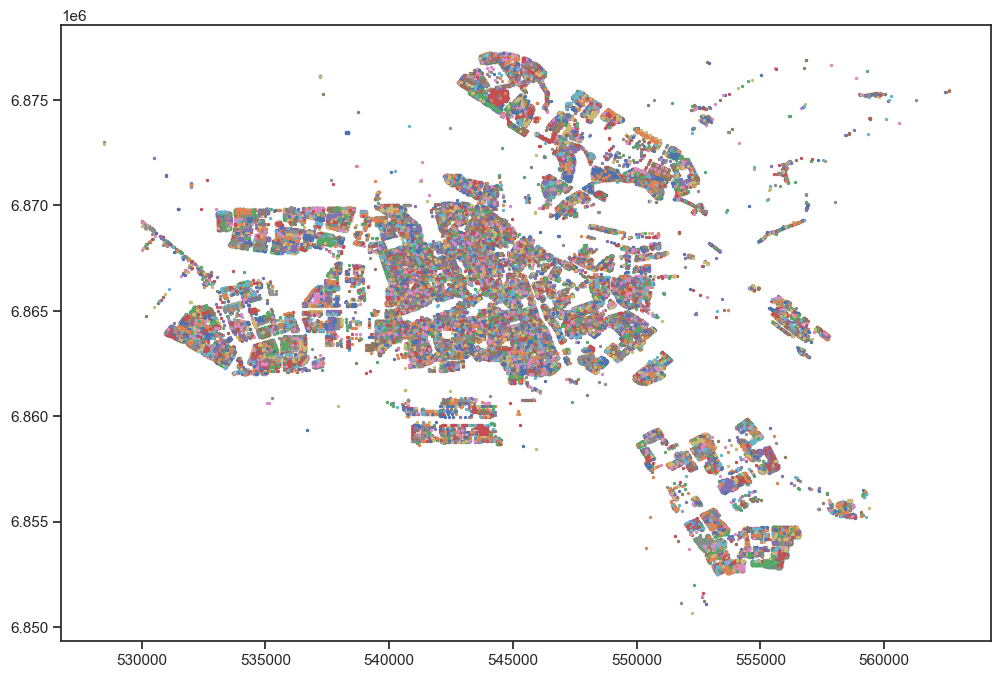

In [41]:
def map_clustering_results(coords, model, dot_size=2):
    labels = model.labels_
    for label in np.unique(labels):
        x = coords['X'].to_numpy()[labels == label]
        y = coords['Y'].to_numpy()[labels == label]
        plt.scatter(x, y, label=model.labels_, s=dot_size)

# Set the size of the figure and adjust the dot size
plt.figure(figsize=(12, 8))  # Adjust the figure size as per your preference
dot_size = 2  # Adjust the dot size as per your preference

# Plot the map clustering results
map_clustering_results(df_coords, brc_model, dot_size)
plt.scatter(df_coords['X'], df_coords['Y'], s=dot_size, c=brc_model.labels_, cmap='tab20b')

# Show the color bar
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Show the plot
plt.show()

# Cluster Evaluation

In [ ]:
import seaborn as sns

# Select the relevant columns for pairwise plotting
columns_of_interest = ['DIANA Cluster', 'HEIGHT', 'AREA', 'VOLUME', 'MBR_LENGTH', 'MBR_WIDTH', 'MBR_L/W', 'PERIMETER', 'WALL_AREA']

# Subset the DataFrame with the selected columsns
subset_df = df[columns_of_interest]

# Drop rows with missing values (NaN)
subset_df = subset_df.dropna()

# Create a pairplot
sns.pairplot(subset_df, hue='DIANA Cluster')

# Show the plot
plt.show()

In [ ]:
# Select the relevant columns for pairwise plotting
columns_of_interest = ['DIANA Cluster', 'VERTEX_COUNT', 'VERTEX_COMPLEXITY', 'ERI', 'CONVEX', 'RI', 'DENSITY', 'NO_POLYLINES', 'BBOX(A)/AREA', 'PER/AREA', 'AREA-VOIDAREA']

# Subset the DataFrame with the selected columns
subset_df = df[columns_of_interest]

# Drop rows with missing values (NaN)
subset_df = subset_df.dropna()

# Create a pairplot
sns.pairplot(subset_df, hue='DIANA Cluster')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute the silhouette coefficients for each sample
silhouette_values = silhouette_samples(scaled_df, df['DIANA Cluster'])

# Compute the average silhouette coefficient for the clustering
average_silhouette_score = silhouette_score(scaled_df, df['DIANA Cluster'])

# Create a silhouette plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(df)), silhouette_values, height=0.7, edgecolor='k')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Sample')
plt.title('Silhouette Plot for DIANA Clustering')
plt.axvline(x=average_silhouette_score, color='red', linestyle='--', linewidth=1.5)
plt.show()

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

The palette list has more values (67) than needed (63), which may not be intended.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\axisgrid.py

<Figure size 1500x1500 with 0 Axes>

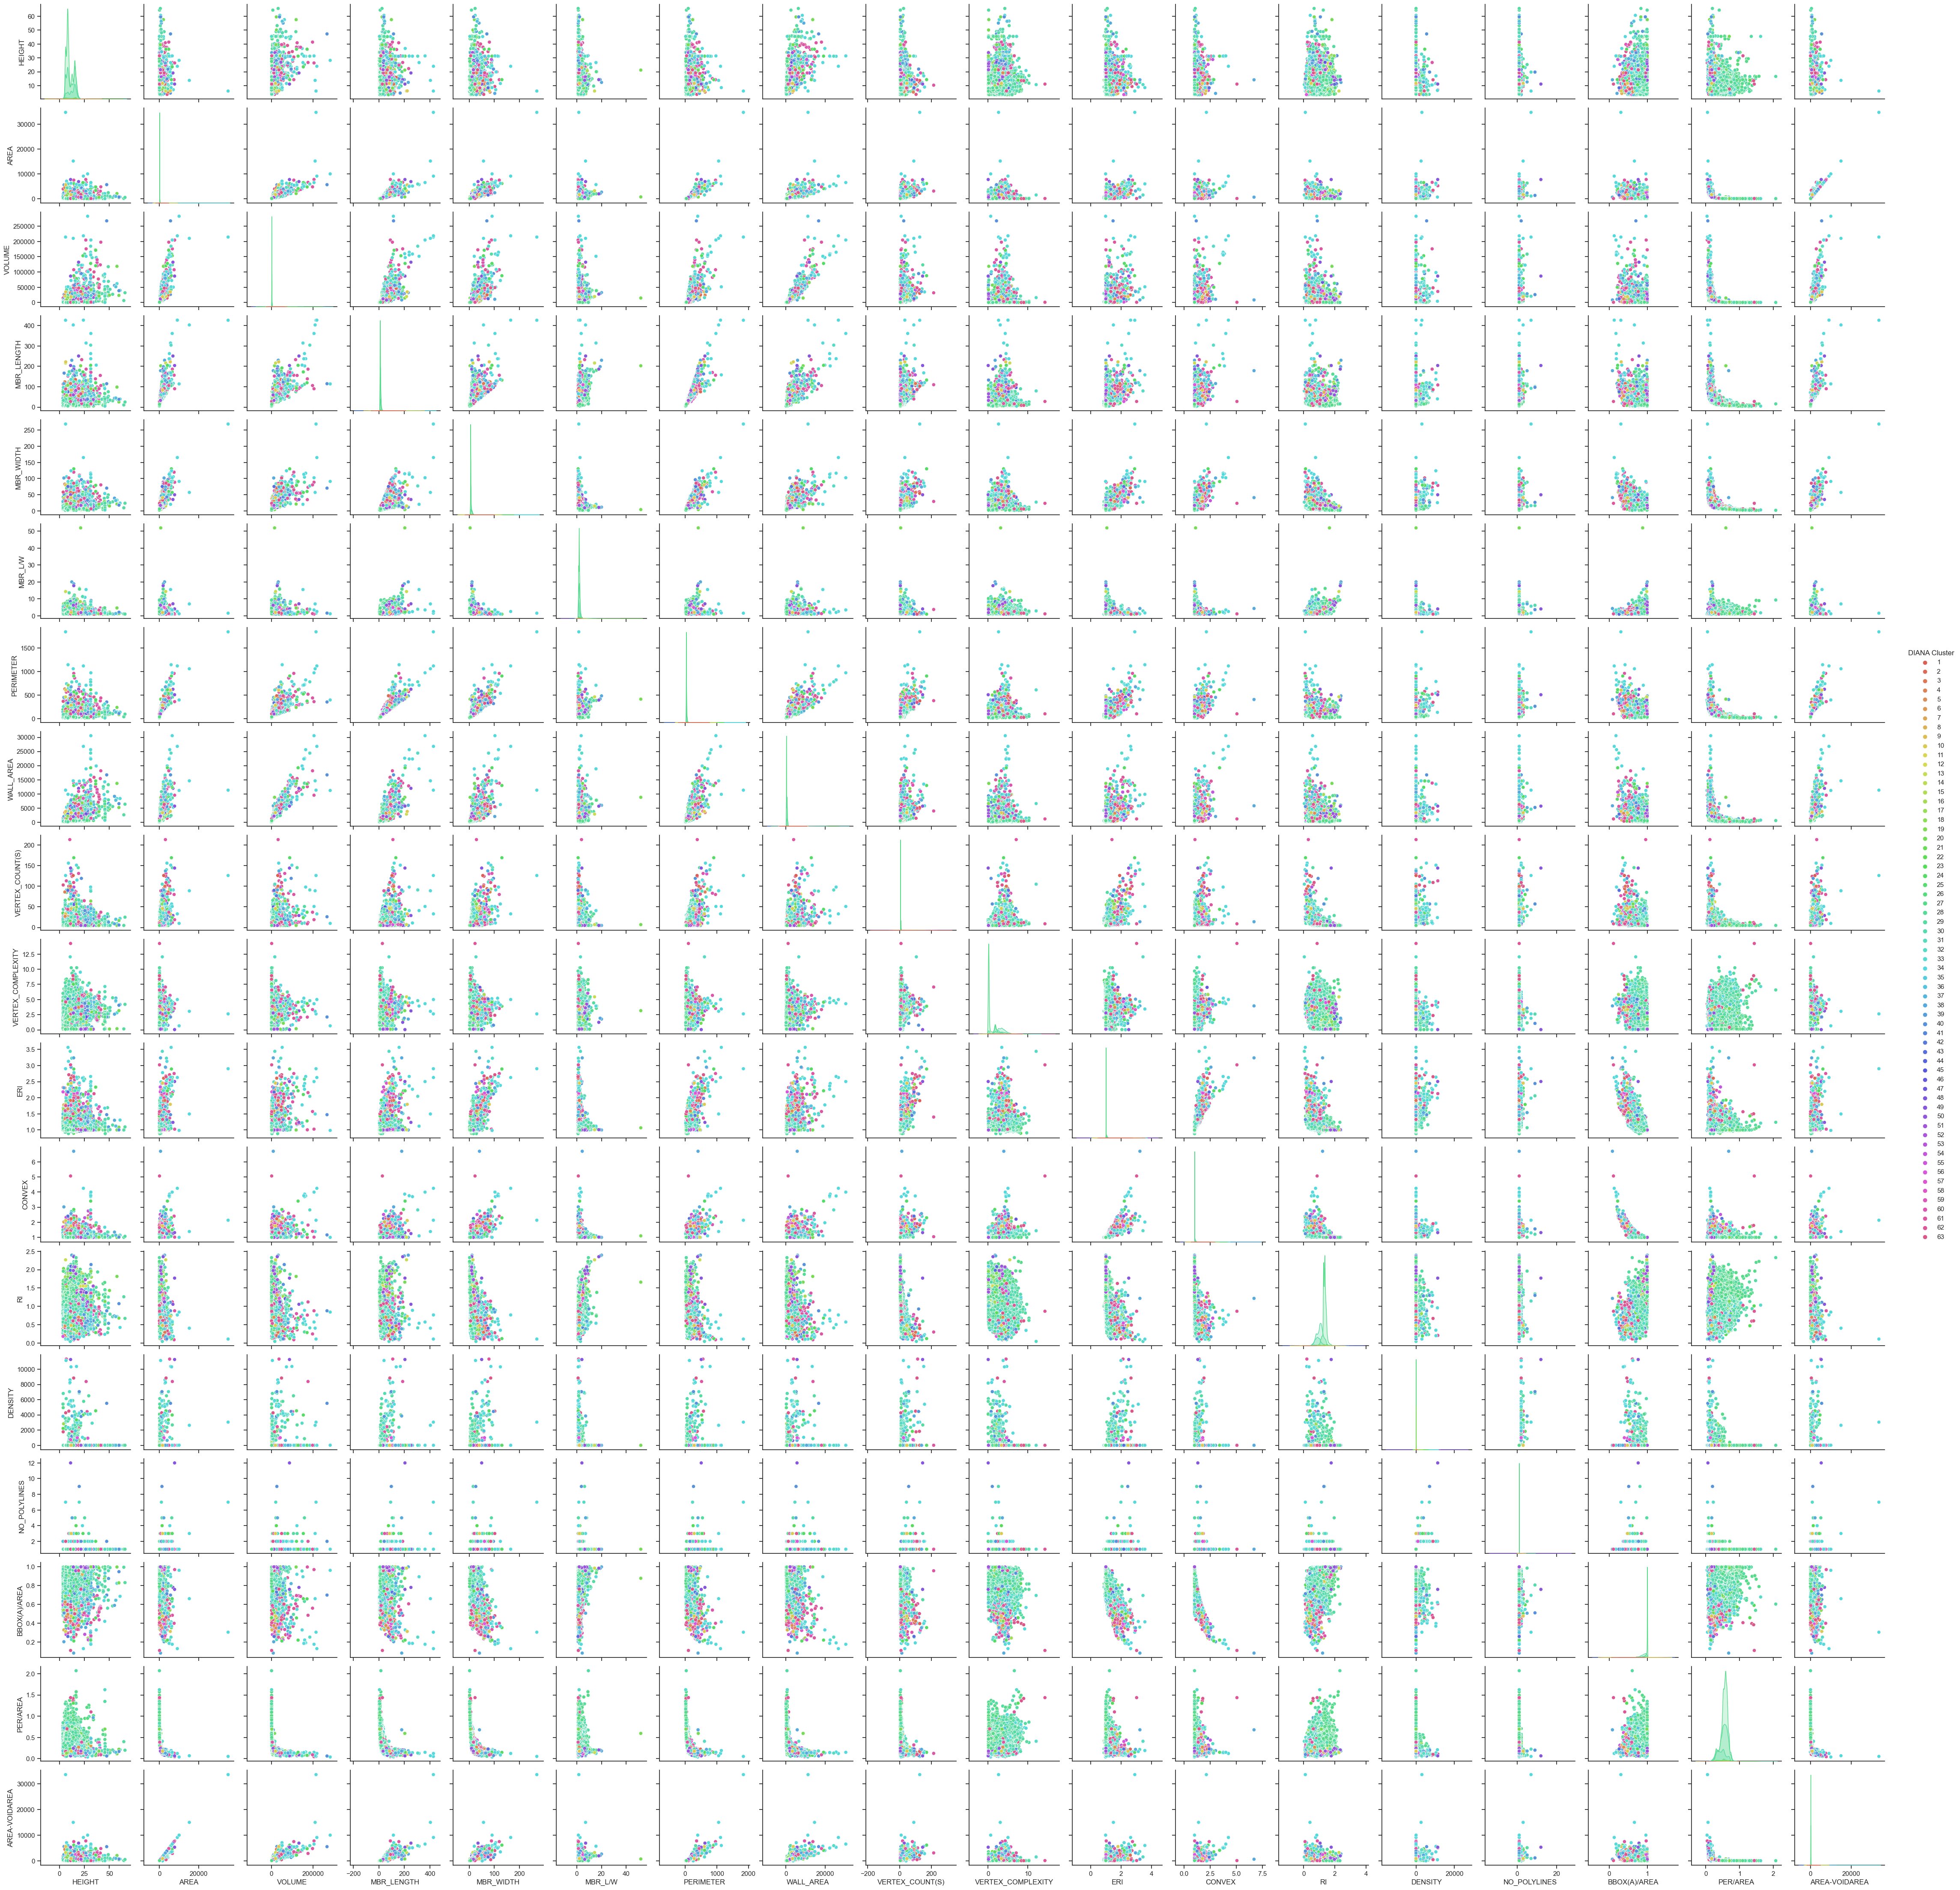

In [27]:
import seaborn as sns

# Select the relevant columns for pairwise plotting
columns_of_interest = ['DIANA Cluster',  'HEIGHT', 'AREA', 'VOLUME', 'MBR_LENGTH', 'MBR_WIDTH', 'MBR_L/W', 'PERIMETER', 'WALL_AREA', 'VERTEX_COUNT(S)', 'VERTEX_COMPLEXITY', 'ERI', 'CONVEX', 'RI', 'DENSITY', 'NO_POLYLINES', 'BBOX(A)/AREA', 'PER/AREA', 'AREA-VOIDAREA']

# Subset the DataFrame with the selected columns
subset_df = df[columns_of_interest]

# Drop rows with missing values (NaN)
subset_df = subset_df.dropna()

# Set the size of the figure
plt.figure(figsize=(15, 15))  # Adjust the figure size as per your preference

# Set the style of the plot
sns.set(style="ticks")

# Set the palette for the clusters
palette = sns.color_palette("hls", 67)  # Replace number with the actual number of clusters

# Create a pairplot with cluster colors
sns.pairplot(subset_df, hue='DIANA Cluster', palette=palette)

# Show the plot
plt.show()